In [60]:
%pip install opendatasets pandas numpy scikit-learn --quiet


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [62]:
data_dir = './weather-dataset-rattle-package'
train_csv = data_dir + '/weatherAUS.csv'
train_csv

'./weather-dataset-rattle-package/weatherAUS.csv'

In [63]:
raw_df = pd.read_csv(train_csv)
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [64]:
raw_df.dropna(subset='RainTomorrow', inplace=True)

<AxesSubplot:title={'center':'No. of Rows per Year'}, xlabel='Date', ylabel='count'>

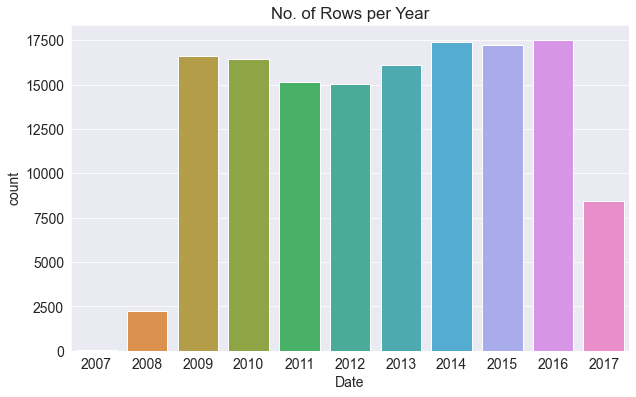

In [65]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)

In [66]:
year = pd.to_datetime(raw_df.Date).dt.year
train_df = raw_df[year<2015]
val_df=raw_df[year==2015]
test_df = raw_df[year > 2015]

In [67]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [68]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()


In [69]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [70]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [71]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [72]:
categorical_cols = train_inputs.select_dtypes(include='object').columns.tolist()
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [73]:
train_df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.729857,0.108449,0.486285,0.063010,0.180393,0.180631,0.178551,-0.228789,0.020254,-0.441724,-0.449679,0.101927,0.044359,0.898887,0.702537
MaxTemp,0.729857,1.000000,-0.071548,0.613590,0.465528,0.067155,0.013579,0.051060,-0.502631,-0.501059,-0.319605,-0.414391,-0.284482,-0.269336,0.884315,0.984015
Rainfall,0.108449,-0.071548,1.000000,-0.077471,-0.228770,0.129821,0.085074,0.052839,0.225409,0.254277,-0.167802,-0.124990,0.204344,0.178695,0.015690,-0.074416
Evaporation,0.486285,0.613590,-0.077471,1.000000,0.372401,0.215338,0.201541,0.135851,-0.530145,-0.407452,-0.276093,-0.300228,-0.197676,-0.194044,0.567880,0.594618
Sunshine,0.063010,0.465528,-0.228770,0.372401,1.000000,-0.031690,0.006852,0.054485,-0.492905,-0.631677,0.046865,-0.012922,-0.680028,-0.703352,0.283707,0.486195
WindGustSpeed,0.180393,0.067155,0.129821,0.215338,-0.031690,1.000000,0.610683,0.689037,-0.226882,-0.029342,-0.464110,-0.419365,0.076732,0.118491,0.154369,0.030721
WindSpeed9am,0.180631,0.013579,0.085074,0.201541,0.006852,0.610683,1.000000,0.524411,-0.279862,-0.032459,-0.235604,-0.181951,0.029967,0.060581,0.133341,0.000329
WindSpeed3pm,0.178551,0.051060,0.052839,0.135851,0.054485,0.689037,0.524411,1.000000,-0.158623,0.009186,-0.299867,-0.259987,0.054819,0.028718,0.166687,0.024597
Humidity9am,-0.228789,-0.502631,0.225409,-0.530145,-0.492905,-0.226882,-0.279862,-0.158623,1.000000,0.662836,0.135360,0.182894,0.453305,0.359444,-0.472150,-0.492985
Humidity3pm,0.020254,-0.501059,0.254277,-0.407452,-0.631677,-0.029342,-0.032459,0.009186,0.662836,1.000000,-0.034693,0.046167,0.526561,0.527148,-0.210354,-0.551599


In [74]:
from sklearn.impute import SimpleImputer

In [75]:
imputer = SimpleImputer(strategy='mean').fit(raw_df[numeric_cols])

In [76]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
scaler = MinMaxScaler().fit(raw_df[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]= scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])


In [79]:
from sklearn.preprocessing import OneHotEncoder

train_df[categorical_cols] = train_df[categorical_cols].fillna('Unknown', inplace=True)
val_df[categorical_cols] = val_df[categorical_cols].fillna('Unknown', inplace=True)
test_df[categorical_cols] = test_df[categorical_cols].fillna('Unknown', inplace=True)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(raw_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))


/var/folders/2b/3st5czb16vvb7_s14r6bml_40000gn/T/ipykernel_43386/3062523938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[categorical_cols] = train_df[categorical_cols].fillna('Unknown', inplace=True)
/var/folders/2b/3st5czb16vvb7_s14r6bml_40000gn/T/ipykernel_43386/3062523938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[categorical_cols] = train_df[categorical_cols].fillna('Unknown', inplace=True)
/var/folders/2b/3st5czb16vvb7_s14r6bml_40000gn/T/ipykernel_43386/3062523938.py:4: SettingWithCopyWarning: 
A value is trying to be set on

In [80]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])


/var/folders/2b/3st5czb16vvb7_s14r6bml_40000gn/T/ipykernel_43386/3778302136.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/var/folders/2b/3st5czb16vvb7_s14r6bml_40000gn/T/ipykernel_43386/3778302136.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/var/folders/2b/3st5czb16vvb7_s14r6bml_40000gn/T/ipykernel_43386/3778302136.py:1: PerformanceWarning: DataFrame is highl

In [81]:
train_inputs.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
count,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.00000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000,98988.000000
mean,0.483557,0.525583,0.006395,0.036934,0.524929,0.265223,0.108470,0.215734,0.686543,0.515015,0.612080,0.608796,0.483856,0.494156,0.506933,0.516827,0.022134,0.021467,0.021306,0.021548,0.020669,0.021447,0.021548,0.022922,0.021508,0.025427,0.021174,0.020972,0.020588,0.023094,0.021427,0.023063,0.006728,0.021467,0.020285,0.021235,0.021225,0.020538,0.021548,0.020215,0.021013,0.006708,0.020609,0.021225,0.021205,0.018861,0.020932,0.023094,0.021235,0.021144,0.020679,0.021235,0.020750,0.024548,0.021235,0.021538,0.021205,0.006324,0.021235,0.019608,0.021225,0.017740,0.020821,0.0211

In [82]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
model = DecisionTreeClassifier(random_state=42)

In [85]:
%%time
model.fit(X_train,train_targets)

CPU times: user 1.6 s, sys: 10.5 ms, total: 1.61 s
Wall time: 1.63 s


DecisionTreeClassifier(random_state=42)

In [86]:
train_preds = model.predict(X_train)
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [87]:
pd.value_counts(train_preds)

No     76707
Yes    22281
dtype: int64

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [89]:
accuracy_score(train_targets,train_preds)

0.9999797955307714

In [90]:
train_probs = model.predict_proba(X_train)
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [91]:
model.score(X_val, val_targets)

0.7921188555510418

In [92]:
from sklearn.tree import plot_tree, export_text

[Text(0.5, 0.9285714285714286, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.25, 0.7857142857142857, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439, 11979]'),
 Text(0.125, 0.6428571428571429, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538, 7714]'),
 Text(0.0625, 0.5, 'Pressure3pm <= 0.583\ngini = 0.363\nsamples = 12620\nvalue = [9618, 3002]'),
 Text(0.03125, 0.35714285714285715, 'WindGustSpeed <= 0.364\ngini = 0.469\nsamples = 4691\nvalue = [2932, 1759]'),
 Text(0.015625, 0.21428571428571427, 'Humidity3pm <= 0.275\ngini = 0.435\nsamples = 3251\nvalue = [2210, 1041]'),
 Text(0.0078125, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.0234375, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.046875, 0.21428571428571427, 'Humidity3pm <= 0.455\ngini = 0.5\nsamples = 1440\nvalue = [722, 718]'),
 Text(0.0390625, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.0546875, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.093

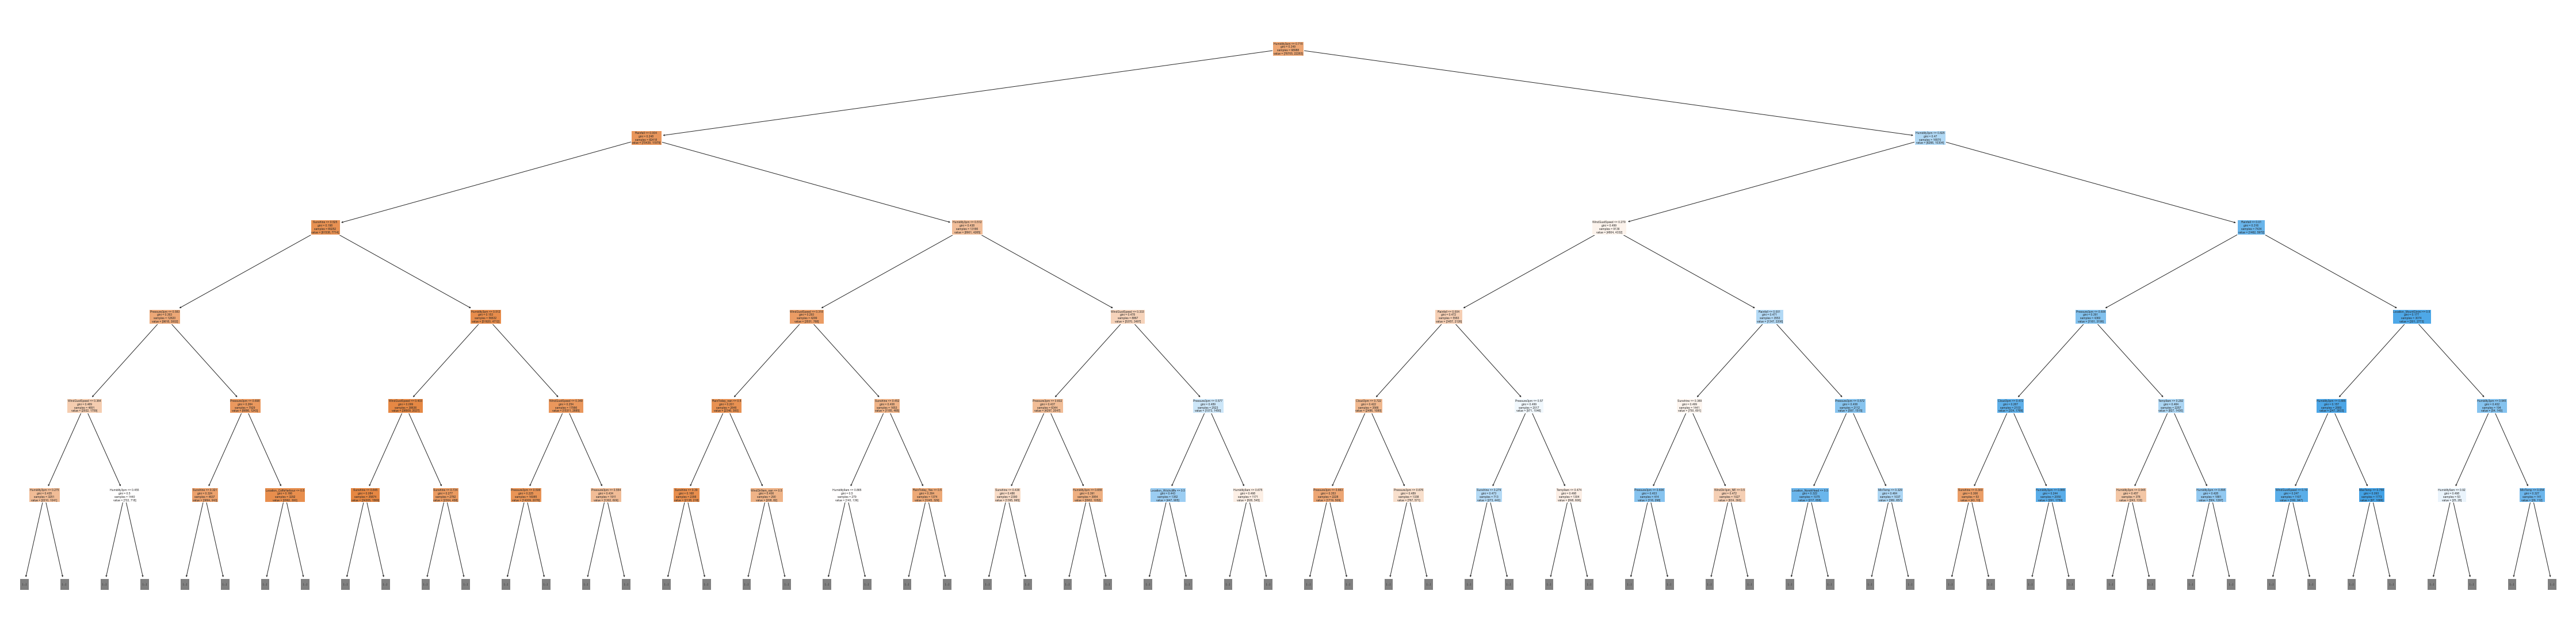

In [93]:
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=X_train.columns, max_depth=5, filled=True)

In [94]:
model.tree_.max_depth

48

In [95]:
tree_test = export_text(model, max_depth=10, feature_names=list(X_train.columns))


In [96]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [97]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.261441
11,Pressure3pm,0.062057
2,Rainfall,0.059139
5,WindGustSpeed,0.056333
4,Sunshine,0.049465
8,Humidity9am,0.040218
14,Temp9am,0.035000
0,MinTemp,0.034894
10,Pressure9am,0.034415
1,MaxTemp,0.032361


In [98]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train,train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [99]:
model.score(X_train,train_targets)

0.8291308037337859

In [100]:
model.score(X_val, val_targets)

0.8334397307178921

In [101]:
model.score(X_test, test_targets)

0.8235928235928236

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]\nclass = No'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439, 11979]\nclass = No'),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538, 7714]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.363\nsamples = 12620\nvalue = [9618, 3002]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.153\nsamples = 56632\nvalue = [51920, 4712]\nclass = No'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.293\nsamples = 4299\nvalue = [3531, 768]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.478\nsamples = 8867\nvalue = [5370, 3497]\nclass = No'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]\nclass = Yes'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]\ncla

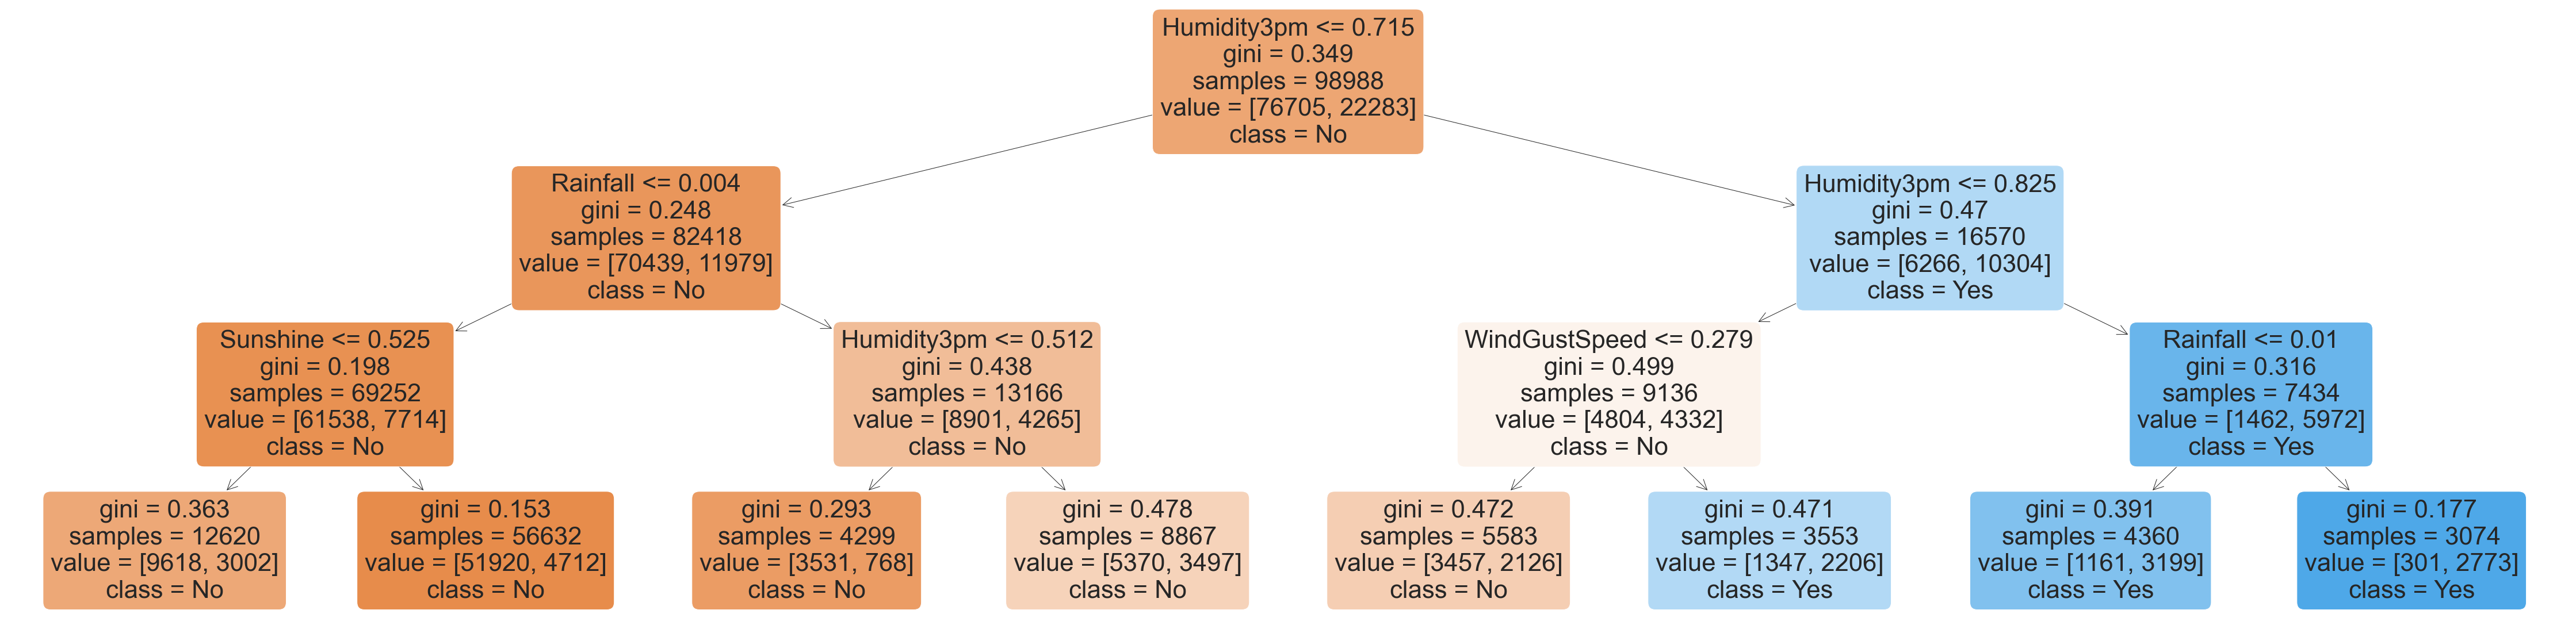

In [102]:
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=X_train.columns,filled=True,rounded=True, class_names=model.classes_)

In [103]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_error = 1-model.score(X_train, train_targets)
    val_error = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_error, 'Validation Error': val_error}

In [104]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: user 19.8 s, sys: 165 ms, total: 19.9 s
Wall time: 20.1 s


In [105]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156271,0.157275
6,7,0.153312,0.154605
7,8,0.147806,0.158029
8,9,0.140906,0.156578
9,10,0.132945,0.157333


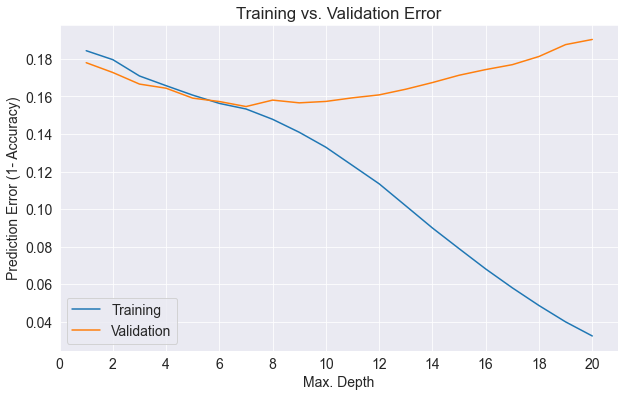

In [106]:
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21,2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1- Accuracy)')
plt.legend(['Training', 'Validation'])


In [107]:
model = DecisionTreeClassifier(max_depth=7, random_state=42).fit(X_train,train_targets)
model.score(X_val,val_targets)

0.8453949277465034

In [108]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)
model.fit(X_train, train_targets)
model.score(X_train,train_targets)

0.8480421869317493

In [109]:
model.score(X_val,val_targets)

0.8442342290058615

In [110]:
def leaves_depth_error(md, ln):
    model = DecisionTreeClassifier(max_depth=md, max_leaf_nodes=ln, random_state=42)
    model.fit(X_train, train_targets)
    train_error = 1-model.score(X_train, train_targets)
    val_error = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Max Leaf Node': ln, 'Training Error': train_error, 'Validation Error': val_error}

In [111]:
def max_leaves_error(ln):
    model = DecisionTreeClassifier(max_leaf_nodes=ln, random_state=42)
    model.fit(X_train, train_targets)
    train_error = 1-model.score(X_train, train_targets)
    val_error = 1 - model.score(X_val, val_targets)
    return {'Max Leaf Nodes': ln, 'Training Error': train_error, 'Validation Error': val_error}

In [112]:
errors_df = pd.DataFrame([max_leaves_error(ln) for ln in range(60, 140)])
errors_df

,Max Leaf Nodes,Training Error,Validation Error
0,60,0.156080,0.156868
1,61,0.156080,0.156868
2,62,0.156080,0.156868
3,63,0.156080,0.156868
4,64,0.155989,0.156752
5,65,0.155989,0.156752
6,66,0.155989,0.156752
7,67,0.155989,0.156752
8,68,0.155989,0.156752
9,69,0.155989,0.156752


In [113]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
%%time
model = RandomForestClassifier(n_jobs=-1, random_state=42)

CPU times: user 29 µs, sys: 76 µs, total: 105 µs
Wall time: 107 µs


In [125]:
model.fit(X_train,train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [126]:
model.score(X_train, train_targets)

0.9999494888269285

In [127]:
model.score(X_val, val_targets)

0.8566537055307295

In [128]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.93, 0.07],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.96, 0.04]])

In [129]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

In [133]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [134]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.139904
4,Sunshine,0.053696
11,Pressure3pm,0.052713
8,Humidity9am,0.050051
2,Rainfall,0.048077
10,Pressure9am,0.047944
5,WindGustSpeed,0.047477
15,Temp3pm,0.044379
1,MaxTemp,0.041865
0,MinTemp,0.041199


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='importance', ylabel='feature'>

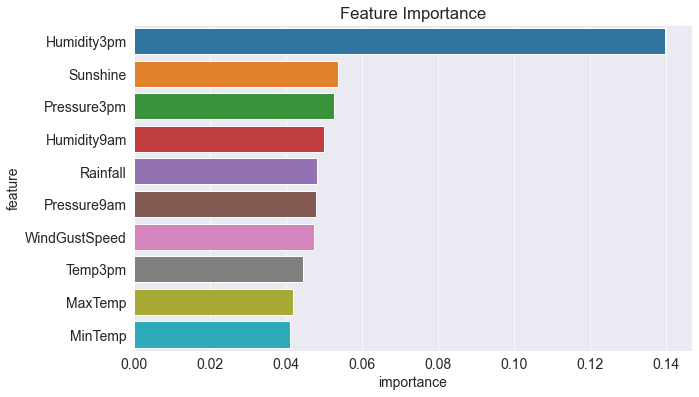

In [135]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature')

In [136]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1, ).fit(X_train, train_targets)

In [137]:
base_train_acc = base_model.score(X_train,train_targets)
base_val_acc = base_model.score(X_val, val_targets)

In [138]:
base_train_acc
base_val_acc

0.8566537055307295

In [139]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10)

In [140]:
model.fit(X_train,train_targets)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.986958015112943, 0.8485868492832686)

In [141]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=500)

In [142]:
model.fit(X_train,train_targets)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9999797955307714, 0.8577563693343393)

In [144]:
def forest_classifier(ne):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=ne)
    model.fit(X_train,train_targets)
    return model.score(X_train, train_targets), model.score(X_val, val_targets)
    

In [146]:
[base_train_acc, base_val_acc] = forest_classifier(1)
base_train_acc
base_val_acc

0.7828332656259068

In [147]:
test = [forest_classifier(ne) for ne in range(1,10)]
test

[(0.9188083404048976, 0.7828332656259068),
 (0.9244554895542894, 0.8177702977192269),
 (0.9656321978421627, 0.8206140096337996),
 (0.9599042308158565, 0.8336138355289885),
 (0.979532872671435, 0.8356450583251117),
 (0.9747444134642583, 0.8394173292321978),
 (0.9867155614821999, 0.8422030062097383),
 (0.982361498363438, 0.8428994254541233),
 (0.9898472542126319, 0.8468458011723057)]

In [148]:
model = RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=500, max_features=7, max_depth=30, class_weight={'No':1, 'Yes':1.5})

In [149]:
model.fit(X_train,train_targets)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=7, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [150]:
model.score(X_train, train_targets)

0.9920192346547057

In [151]:
model.score(X_val, val_targets)

0.8563054959085369